In [2]:
conda init bash

no change     /home/osboxes/Anaconda/condabin/conda
no change     /home/osboxes/Anaconda/bin/conda
no change     /home/osboxes/Anaconda/bin/conda-env
no change     /home/osboxes/Anaconda/bin/activate
no change     /home/osboxes/Anaconda/bin/deactivate
no change     /home/osboxes/Anaconda/etc/profile.d/conda.sh
no change     /home/osboxes/Anaconda/etc/fish/conf.d/conda.fish
no change     /home/osboxes/Anaconda/shell/condabin/Conda.psm1
no change     /home/osboxes/Anaconda/shell/condabin/conda-hook.ps1
no change     /home/osboxes/Anaconda/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /home/osboxes/Anaconda/etc/profile.d/conda.csh
no change     /home/osboxes/.bashrc
No action taken.

Note: you may need to restart the kernel to use updated packages.


In [1]:
conda activate BIG_DATA


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
os.getcwd()

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext(master="local[4]")

Number of random points: 1000000
Mean: [ 0.00064464 -0.00040892]
stdev: [0.57737935 0.57792187]
The estimation of \pi is: 3.140008


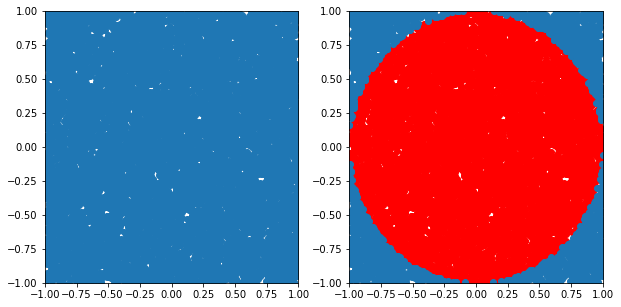

In [2]:



import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0
                       for i in range(TOTAL)]) \
         .cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)) \
          .collect()
Y = sample.map(itemgetter(1)) \
          .collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle) \
               .cache()
dotsOut = sample.filter(lambda v: not inCircle(v)) \
                .cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)) \
            .collect()
Yin = dotsIn.map(itemgetter(1)) \
            .collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)) \
              .collect()
Yout = dotsOut.map(itemgetter(1)) \
              .collect()
plt.scatter(Xout, Yout)

pi = 4.0 * (dots.filter(inCircle).count()*1.0 / TOTAL)
print("The estimation of \pi is:", pi)